In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 第一題
## 有A,B,C三個班級，每班皆有10個學生，期中考結束後，老師希望計算各班級每位學生的加權平均成績。
## 請隨機產生3個班級的成績單,每班10人,共五科,權重為weights=[0.25,0.25,0.25,0.15,0.10]。請算出班級加權平均成績，並以一個array輸出。

In [2]:
grade= np.random.randint(0,101,150)

In [3]:
grade.shape=(3,10,5)

In [4]:
weights=np.array([0.25,0.25,0.25,0.15,0.10])

In [6]:
h1=np.dot(grade,weights)
h1

array([[43.  , 42.25, 50.35, 35.3 , 68.45, 54.65, 54.3 , 51.9 , 51.7 ,
        56.65],
       [58.2 , 57.35, 54.25, 40.35, 48.75, 31.65, 34.5 , 47.9 , 66.15,
        49.95],
       [54.2 , 52.55, 37.75, 15.2 , 76.05, 58.6 , 34.7 , 42.4 , 32.95,
        25.  ]])

In [33]:
mean=np.array([np.mean(h1[0,0:10]),np.mean(h1[1,0:10]),np.mean(h1[2,0:10])])
mean

array([50.855, 48.905, 42.94 ])

# 第二題：
## 向日葵班有40位學生，學期結束後，老師希望知道班上的期末成績相關資訊，作為下個學期教學的參考。
## 請隨機產生40筆0~100的數字作為向日葵班的成績分佈，接著列出最高分、最低分、及格人數(>=60)、平均數、標準差，並且以10分作為一個區間，使用圖表畫出各個區間的人數。

In [138]:
grades=np.random.randint(0,101,40)

In [201]:
a=max(grades)#最大數
b=min(grades)#最小數
c=len(grades[grades>60])#及格人數
d=np.mean(grades)#平均
e=np.std(grades)#標準差
print("最高分:"+str(a))
print("最低分:"+str(b))
print("及格人數:"+str(c))
print("平均:"+str(d))
print("標準差:"+str(e))

最高分:94
最低分:0
及格人數:14
平均:41.45
標準差:29.840366954848257


In [202]:
grades=pd.DataFrame(grades)[0]
grades=grades.sort_values()
k=[-1,10,20,30,40,50,60,70,80,90,101]
groupname=["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-100"]
grades1=pd.cut(grades,k,labels=groupname)
kk=pd.value_counts(grades1)

<BarContainer object of 10 artists>

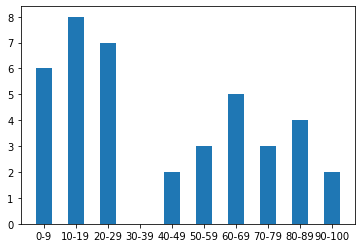

In [204]:
plt.bar(groupname,height=kk[groupname],width=0.5)

# 請定義一個全班高微成績的函式，輸入是一個(3, 30, 3)的array，  
## 表示3個班級中30位學生的成績(小考，期中考，期末考)  。
## 目標輸出則是一個(3, 30, 1)的array，表示所有學生的期末成績，
## 期末成績計算方式如下：
### 1. 小考20%，期中考35%，期末考45%  
### 2. 期中考40%，期末考60%。  
#### 擇優作為期末成績

In [218]:
g=np.random.randint(0,101,270)

In [219]:
g.shape=(3,30,3)
k1=np.array((0.2,0.35,0.45))
k2=np.array((0,0.3,0.6))

In [282]:
g1=np.dot(g,k1)
g2=np.dot(g,k2)
k=list()

In [234]:
g1

array([[46.2 , 40.7 , 36.9 , 49.65, 41.15, 56.1 , 59.  , 56.5 , 24.05,
        85.7 , 77.65, 19.  , 56.75, 56.  , 30.85, 38.25, 68.9 , 50.4 ,
        68.5 , 12.8 , 36.1 , 39.65, 59.45, 37.55, 45.4 , 47.1 , 68.1 ,
        50.55, 44.25, 52.2 ],
       [25.  , 70.7 , 25.15, 82.1 , 37.85, 47.75, 59.2 , 45.1 , 72.85,
        56.3 , 52.65, 76.3 , 52.45, 60.25, 89.4 , 72.9 , 82.95, 76.65,
        63.6 , 37.7 , 39.5 , 59.35, 51.75, 51.9 , 41.7 , 61.4 , 12.15,
        23.85, 49.2 , 46.3 ],
       [36.3 , 15.9 , 58.1 , 80.3 , 28.25, 65.75, 72.55, 23.85, 69.3 ,
        38.75, 62.8 , 66.65, 31.25, 48.6 , 41.8 , 50.05, 13.05, 70.9 ,
        58.85, 80.7 , 66.9 , 55.7 , 29.7 , 45.7 , 72.2 , 46.9 , 23.6 ,
        60.5 , 35.4 , 73.9 ]])

In [283]:
for i in range(0,30):
    if (g1[0,i]>g2[0,i]):
        k.append(g1[0,i])
    else:
        k.append(g2[0,i])
    if (g1[1,i]>g2[1,i]):
        k.append(g1[1,i])
    else:
        k.append(g2[1,i])
    if (g1[2,i]>g2[2,i]):
        k.append(g1[2,i])
    else:
        k.append(g2[2,i])

In [287]:
kk=np.array(k)
kk.shape=(3,30,1)

In [288]:
kk

array([[[57.3 ],
        [25.  ],
        [40.5 ],
        [49.8 ],
        [70.7 ],
        [15.9 ],
        [36.9 ],
        [27.  ],
        [58.1 ],
        [49.65],
        [87.  ],
        [80.3 ],
        [41.15],
        [37.85],
        [28.25],
        [60.6 ],
        [47.75],
        [65.75],
        [59.  ],
        [62.4 ],
        [78.  ],
        [58.2 ],
        [45.1 ],
        [23.85],
        [24.05],
        [74.1 ],
        [69.3 ],
        [85.7 ],
        [60.6 ],
        [38.75]],

       [[77.65],
        [52.65],
        [62.8 ],
        [19.  ],
        [78.  ],
        [68.7 ],
        [59.1 ],
        [52.45],
        [31.25],
        [56.  ],
        [64.8 ],
        [48.6 ],
        [40.2 ],
        [89.4 ],
        [41.8 ],
        [43.8 ],
        [72.9 ],
        [50.05],
        [68.9 ],
        [82.95],
        [13.05],
        [50.4 ],
        [76.65],
        [70.9 ],
        [76.2 ],
        [70.2 ],
        [58.85],
        [12.8 ],
        [41.

# 挑戰題二：
## 題目：給定一個矩陣m，裡面的值都大於0。
## 請將矩陣m裡大於等於1的數字都變成1，小於1的變成0。
### 提示：使用巢狀迴圈(nested loop)加判斷式

In [11]:
m=abs(np.random.randn(50,20))
m[m<1]=0
m[m>=1]=1
m

array([[0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
        0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
        0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.

# 自己出
## 創一張成績單，輸入自己的座號，會給你各項資訊

In [2]:
grade= np.random.randint(0,101,150)
grade.shape=(30,5)

In [5]:
grade

array([[ 95,  26,  43,  41,  41],
       [ 30,  41,  21,   6,  69],
       [  2,  24,  55, 100,  98],
       [ 46,  52,  17,  30,  80],
       [ 43,   8,  50,  70,  59],
       [ 89,  42,  14,  13,  21],
       [ 59,  68,  81,  88,  58],
       [ 78,  60,  19,  18,  10],
       [ 68,  90,  27,   8,  47],
       [ 89,   6,  81,  76,  64],
       [ 27,  75,  11,  25,  33],
       [ 70,  73,  45,  76,  37],
       [ 18,  22,  65,  53,  51],
       [ 18,  78,  60,  88,  73],
       [ 72,  48,  98,   5,   7],
       [ 75,  30,   6,  93,  43],
       [ 11,  25,  25,  44,  75],
       [ 15,  73,  41,  38,  52],
       [ 42,  76,  84,  87,  79],
       [  2,   5,  90,  39,  26],
       [ 33,  10,  52,  97,  31],
       [ 34,  57,  26,  39,  94],
       [ 60,  51,  47,  26,  30],
       [ 70,  70,  50,  17,  72],
       [ 90,  20,   2,   8,  90],
       [ 42,  79,  91,  11,  29],
       [ 90,  40,  57,  15,   9],
       [  1,  31,  95,  71,  84],
       [ 26,  69,  84,  49,  75],
       [ 37,  

In [8]:
e=input("你的座號為:")
e=int(e)
if e>30:
    print("全班沒那麼多人")

elif e<=0:
    print("別亂輸入")
else:
    k= 2
    while k!="":
        k=input("你想知道的個人資訊:(可知訊息:國文、英文、數學、自然、社會、總分、平均)")
        if (k=="國文"):
            print(grade[e-1,0])
        elif (k=="數學"):
            print(grade[e-1,1])
        elif (k=="英文"):
            print(grade[e-1,2])
        elif (k=="自然"):
            print(grade[e-1,3])
        elif (k=="社會"):
            print(grade[e-1,4])
        elif(k=="總分"):
            print(sum(grade[e-1,]))
        elif(k=="平均"):
            print(np.mean(grade[e-1,]))
        elif(k=="排名"):
            print("請跟自己比較就好")
        else:
            print("輸入錯誤訊息")

你的座號為:0
別亂輸入
